In [1]:
#pip install -U numpy==1.19.2

In [2]:
#conda install -c anaconda keras-gpu

In [3]:
#conda install -c anaconda pandas

In [4]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(123)
#import random as rn
#rn.seed(123)
#import tensorflow as tf
#tf.random.set_seed(1234)
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
stocks = pd.read_csv('indices.csv',index_col='Dates')
stocks = stocks.dropna(axis=0)
stocks

,NiKKEI,FTSE100,S&P500
Dates,,,
04/01/1988,21217.04,1747.50,255.94
05/01/1988,21575.28,1789.60,258.63
06/01/1988,22790.50,1787.10,258.89
07/01/1988,22792.13,1787.20,261.07
08/01/1988,22872.56,1773.40,243.40
...,...,...,...
24/06/2020,22534.32,6123.69,3050.33
25/06/2020,22259.79,6147.14,3083.76
26/06/2020,22512.08,6159.30,3009.05


In [5]:
data = np.log(stocks.pct_change() + 1)
data=data.dropna()
data

,NiKKEI,FTSE100,S&P500
Dates,,,
05/01/1988,0.016744,0.023806,0.010455
06/01/1988,0.054796,-0.001398,0.001005
07/01/1988,0.000072,0.000056,0.008385
08/01/1988,0.003523,-0.007752,-0.070082
11/01/1988,-0.012943,-0.007471,0.016664
...,...,...,...
24/06/2020,-0.000653,-0.031573,-0.026195
25/06/2020,-0.012258,0.003822,0.010900
26/06/2020,0.011270,0.001976,-0.024525


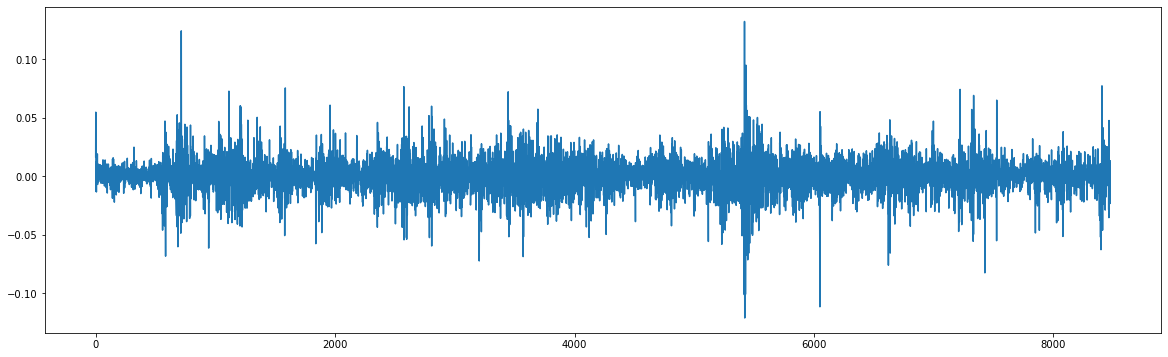

In [6]:
plt.figure(figsize=(20,6))
plt.plot(data['NiKKEI'].values)
plt.show()

In [7]:
#scaler = MinMaxScaler(feature_range=(-1, 1))
data1 = data['NiKKEI'].to_numpy(dtype='float32')
data2 = data['FTSE100'].to_numpy(dtype='float32')
data3 = data['S&P500'].to_numpy(dtype='float32')
#data1 = data1.reshape(-1,1)
#data2 = data2.reshape(-1,1)
#data3 = data3.reshape(-1,1)
#scaled = scaler.fit_transform(data1)
data1 = pd.DataFrame(data1)
#scaled = scaler.fit_transform(data2)
data2 = pd.DataFrame(data2)
#scaled = scaler.fit_transform(data3)
data3 = pd.DataFrame(data3)

In [8]:
data1

,0
0,0.016744
1,0.054796
2,0.000072
3,0.003523
4,-0.012943
...,...
8471,-0.000653
8472,-0.012258
8473,0.011270
8474,-0.023235


In [9]:
# Setup the time steps
window_size = 90

series_nikkei = data1.copy()
series_ftse100 = data2.copy()
series_sp500 = data3.copy()
for i in range(window_size):
    data1 = pd.concat([data1, series_nikkei.shift(-(i+1))], axis = 1)
    data2 = pd.concat([data2, series_ftse100.shift(-(i+1))], axis = 1)
    data3 = pd.concat([data3, series_sp500.shift(-(i+1))], axis = 1)
    
data1.dropna(axis=0, inplace=True)
data2.dropna(axis=0, inplace=True)
data3.dropna(axis=0, inplace=True)
print(data1.head())
print(data1.shape)

          0         0         0         0         0         0         0  \
0  0.016744  0.054796  0.000072  0.003523 -0.012943  0.002063 -0.013351   
1  0.054796  0.000072  0.003523 -0.012943  0.002063 -0.013351  0.012405   
2  0.000072  0.003523 -0.012943  0.002063 -0.013351  0.012405  0.000000   
3  0.003523 -0.012943  0.002063 -0.013351  0.012405  0.000000  0.013471   
4 -0.012943  0.002063 -0.013351  0.012405  0.000000  0.013471 -0.000525   

          0         0         0  ...         0         0         0         0  \
0  0.012405  0.000000  0.013471  ... -0.002013  0.008866  0.000000  0.008551   
1  0.000000  0.013471 -0.000525  ...  0.008866  0.000000  0.008551  0.000000   
2  0.013471 -0.000525 -0.002406  ...  0.000000  0.008551  0.000000  0.000000   
3 -0.000525 -0.002406 -0.005834  ...  0.008551  0.000000  0.000000  0.000000   
4 -0.002406 -0.005834  0.007297  ...  0.000000  0.000000  0.000000 -0.004903   

          0         0         0         0         0         0  
0  0

In [10]:
train = data1.iloc[:7000, :]
test = data1.iloc[7000:,:]

#validation_percent = 0.9
#no_validation_obs = int(np.round(validation_percent*len(train)))
#validation = train[:-no_validation_obs]
scaler = StandardScaler()

print(train.shape)
print(test.shape)

#train =pd.DataFrame(scaler.fit_transform(train))
#test = pd.DataFrame(scaler.transform(test))
#from sklearn.utils import shuffle
#train = shuffle(train)
# Discard the last value
#print(val)
train_X = train.iloc[:,:-1]
train_X =pd.DataFrame(scaler.fit_transform(train_X))
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_X = pd.DataFrame(scaler.transform(test_X))
test_y = test.iloc[:,-1]
#val_X = val.iloc[:,:-1]
#val_y = val.iloc[:,-1]
#val_X = val_X.values
#print(val_X.shape)
#val_y = val_y.values
#print(val_y.shape)
train_X = train_X.values
print(train_X.shape)
train_y = train_y.values
print(train_y.shape)
test_X = test_X.values
print(test_X.shape)
test_y = test_y.values
print(test_y.shape)


(7000, 91)
(1386, 91)
(7000, 90)
(7000,)
(1386, 90)
(1386,)


In [11]:
train_X

array([[ 1.15359020e+00,  3.76887584e+00,  7.83850066e-03, ...,
         3.84097779e-03, -3.32792461e-01, -6.73093677e-01],
       [ 3.76954579e+00,  7.33602140e-03,  2.45295852e-01, ...,
        -3.32767993e-01, -6.72957122e-01,  3.75188351e-01],
       [ 7.43756769e-03,  2.44553894e-01, -8.87631118e-01, ...,
        -6.72933459e-01,  3.75364661e-01, -6.28361106e-01],
       ...,
       [ 4.61934924e-01,  3.24164605e+00,  2.91760825e-03, ...,
         1.09456144e-01, -3.89362089e-02, -4.04615045e-01],
       [ 3.24223638e+00,  2.42009154e-03,  1.85864258e+00, ...,
        -3.89110409e-02, -4.04468358e-01,  1.80492193e-01],
       [ 2.52089510e-03,  1.85627353e+00,  3.07660908e-01, ...,
        -4.04444039e-01,  1.80661097e-01,  8.01366031e-01]], dtype=float32)

In [12]:
train_y

array([ 0.00541184, -0.00920603,  0.0018954 , ...,  0.00257586,
        0.01161962, -0.00955741], dtype=float32)

In [13]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)
print(train_X.shape)
print(test_X.shape)

(7000, 90, 1)
(1386, 90, 1)


In [14]:
np.random.seed(42)
import random as rn
rn.seed(12345)
import tensorflow as tf
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)
tf.random.set_seed(1234)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


model = Sequential()
model.add(LSTM(input_shape = (90,1), activation = 'tanh', units= 90, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(150))
model.add(Dense(1))               #tanh has been remove as you requested
model.compile(loss="mse", optimizer="adam")
history_of_the_model = model.fit(train_X, train_y, batch_size=128, epochs=111,validation_split=0.2,verbose =2, shuffle=False)
model.summary()


Epoch 1/111
44/44 - 22s - loss: 5.2931e-04 - val_loss: 1.8306e-04
Epoch 2/111
44/44 - 18s - loss: 2.2863e-04 - val_loss: 1.8249e-04
Epoch 3/111
44/44 - 18s - loss: 2.2726e-04 - val_loss: 1.9955e-04
Epoch 4/111
44/44 - 19s - loss: 2.2961e-04 - val_loss: 1.8902e-04
Epoch 5/111
44/44 - 19s - loss: 2.2467e-04 - val_loss: 1.9729e-04
Epoch 6/111
44/44 - 19s - loss: 2.2512e-04 - val_loss: 1.9390e-04
Epoch 7/111
44/44 - 19s - loss: 2.2404e-04 - val_loss: 2.0057e-04
Epoch 8/111
44/44 - 19s - loss: 2.2407e-04 - val_loss: 1.9768e-04
Epoch 9/111
44/44 - 19s - loss: 2.2280e-04 - val_loss: 1.9566e-04
Epoch 10/111
44/44 - 19s - loss: 2.2330e-04 - val_loss: 1.9656e-04
Epoch 11/111
44/44 - 19s - loss: 2.2488e-04 - val_loss: 1.9882e-04
Epoch 12/111
44/44 - 19s - loss: 2.2365e-04 - val_loss: 1.9790e-04
Epoch 13/111
44/44 - 19s - loss: 2.2344e-04 - val_loss: 1.9293e-04
Epoch 14/111
44/44 - 19s - loss: 2.2270e-04 - val_loss: 1.9628e-04
Epoch 15/111
44/44 - 19s - loss: 2.2482e-04 - val_loss: 1.9891e-04
Epoc

In [15]:
history_of_the_model.history['loss'][0]

0.0005293085123412311

In [16]:
history_of_the_model.history['val_loss'][0]

0.0001830553956096992

In [17]:
#history = model.fit(train_X, train_y, batch_size=512, epochs=5,validation_split=0.1, shuffle=False)

In [18]:
preds = model.predict(test_X)

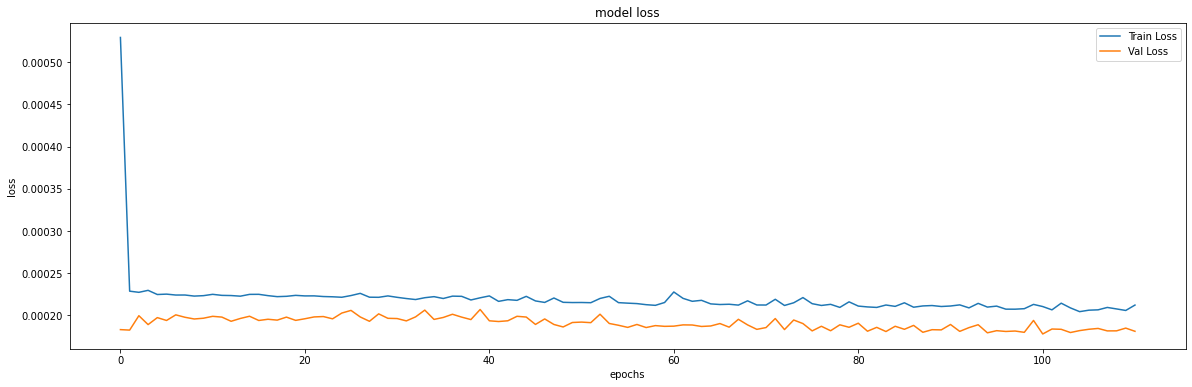

In [19]:
plt.figure(figsize=(20,6))
plt.plot(history_of_the_model.history['loss'], label='Train Loss')
plt.plot(history_of_the_model.history['val_loss'], label='Val Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [20]:
mse_error = mean_squared_error(data['NiKKEI'][7090:], preds) #the original test data and the unscaled the predic.
print(mse_error)

0.0001725089944391697


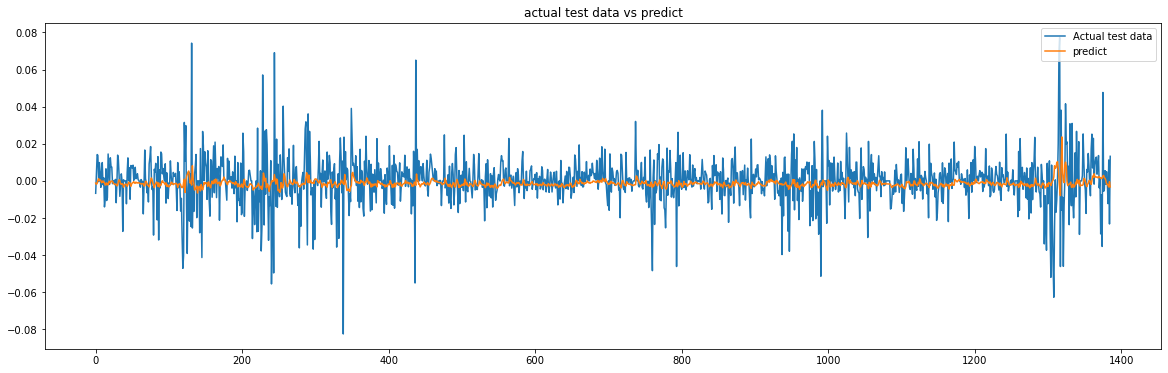

In [21]:
plt.figure(figsize=(20,6))
plt.plot(data['NiKKEI'][7090:].values, label='Actual test data')
plt.plot(preds, label='predict')
plt.title('actual test data vs predict')
#plt.ylabel('loss')
plt.xlabel('')
plt.legend(loc='upper right')
plt.show()

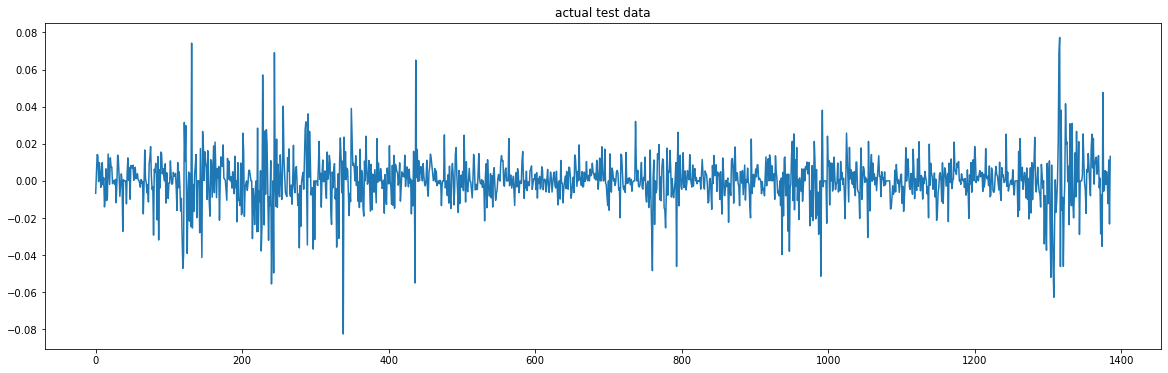

In [22]:
plt.figure(figsize=(20,6))
plt.plot(data['NiKKEI'][7090:].values)
plt.title('actual test data')
plt.show()

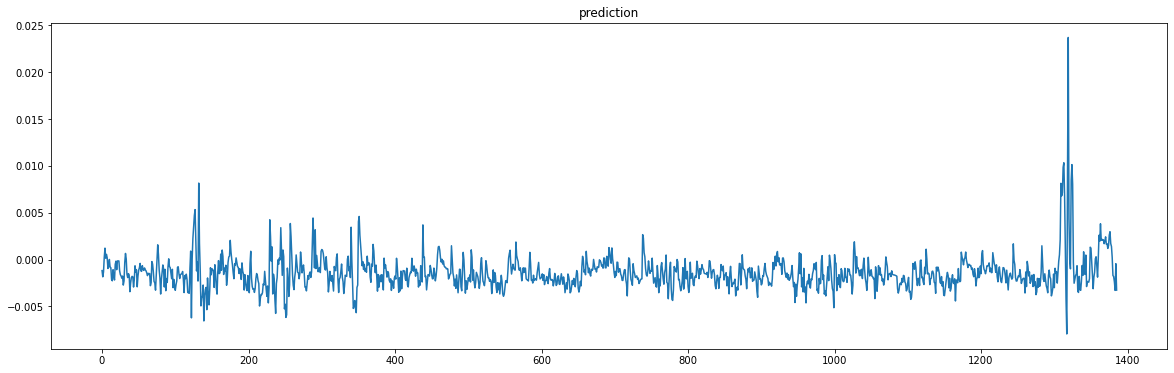

In [23]:
plt.figure(figsize=(20,6))
plt.plot(preds)
plt.title('prediction')
plt.show()

In [24]:
test_y=pd.DataFrame(test_y)
test_y

,0
0,-0.006698
1,0.003124
2,0.014190
3,0.013761
4,-0.000425
...,...
1381,-0.000653
1382,-0.012258
1383,0.011270
1384,-0.023235


In [25]:
import math
K=data['NiKKEI'][:7090].std()

In [26]:
N = pd.DataFrame(np.random.normal(0,1,1386))
final_predictions= preds + (N * K)


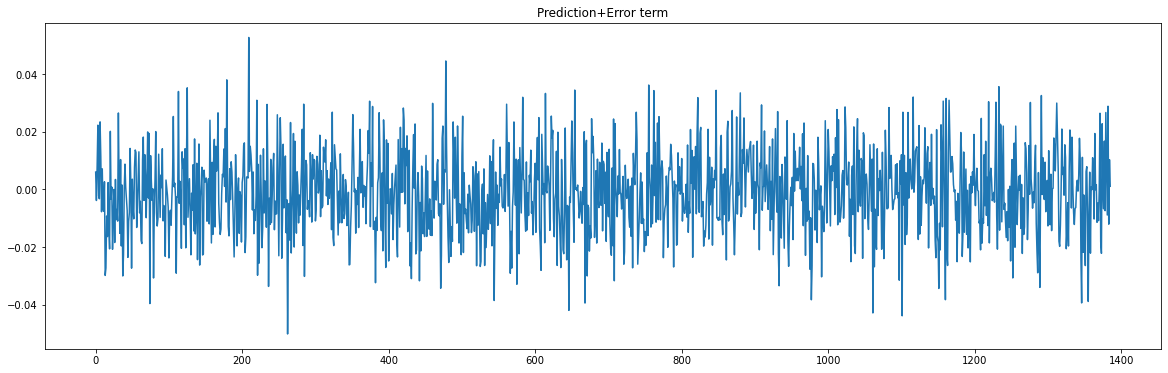

In [27]:
plt.figure(figsize=(20,6))
plt.plot(final_predictions.values)
plt.title('Prediction+Error term')
plt.show()

In [28]:
test_y = test_y.to_numpy()

In [29]:
breaches_95, breaches_99 = 0, 0
var_95, var_99 = np.zeros(1386), np.zeros(1386)
for i in range(0,1386):
    #step 1
    s = (np.random.normal(0,1,1000))
    # step 2
    final_pred = preds[i] + (s * K) 
    final_pred=np.sort(final_pred)
    final_pred=np.flip(final_pred)
    #step 3
    var95 = 0.5*(final_pred[950]+final_pred[951])
    var99 = 0.5*(final_pred[990]+final_pred[991])
    var_95[i] = var95
    var_99[i] = var99
    #step 4
    if test_y[i] < var95:
        breaches_95 += 1
   
    if test_y[i] < var99:
        breaches_99 += 1
    print("Test data number:", i)
    print(var95,breaches_95)
    print(var99,breaches_99)
    #step 5
    train_X = np.append(train_X, [test_X[i,:,:]], axis=0)
    train_y = np.append(train_y, preds[i], axis=0)
    history = model.fit(train_X, train_y, batch_size=128, epochs=1,validation_split=0.2,verbose =2, shuffle=False)


Test data number: 0
-0.024387254904617905 0
-0.036458755979619395 0
44/44 - 19s - loss: 2.0874e-04 - val_loss: 1.8219e-04
Test data number: 1
-0.02596818644476083 0
-0.034382529240520994 0
44/44 - 18s - loss: 2.0588e-04 - val_loss: 1.7889e-04
Test data number: 2
-0.027424403674097993 0
-0.03701972738575636 0
44/44 - 18s - loss: 2.0475e-04 - val_loss: 1.8041e-04
Test data number: 3
-0.023303240473934915 0
-0.03227097703012385 0
44/44 - 18s - loss: 2.0604e-04 - val_loss: 1.8820e-04
Test data number: 4
-0.02322057224443705 0
-0.034496847668220074 0
44/44 - 18s - loss: 2.0910e-04 - val_loss: 1.8016e-04
Test data number: 5
-0.025761693207265464 0
-0.035242869249836065 0
44/44 - 17s - loss: 2.0539e-04 - val_loss: 1.8537e-04
Test data number: 6
-0.02444209694659856 0
-0.034537634355788174 0
44/44 - 18s - loss: 2.1057e-04 - val_loss: 1.7913e-04
Test data number: 7
-0.02400300851693945 0
-0.03138607136419752 0
44/44 - 20s - loss: 2.1124e-04 - val_loss: 1.8105e-04
Test data number: 8
-0.02372694

45/45 - 20s - loss: 1.9983e-04 - val_loss: 1.7620e-04
Test data number: 68
-0.02349891243048262 1
-0.036598610277213166 0
45/45 - 20s - loss: 2.0260e-04 - val_loss: 1.7633e-04
Test data number: 69
-0.024583596376484593 1
-0.0336757534552226 0
45/45 - 20s - loss: 2.0486e-04 - val_loss: 1.7566e-04
Test data number: 70
-0.02490198244737208 1
-0.03703098879502324 0
45/45 - 20s - loss: 1.9975e-04 - val_loss: 1.7656e-04
Test data number: 71
-0.026175779718165107 1
-0.036374713278712736 0
45/45 - 20s - loss: 1.9888e-04 - val_loss: 1.7572e-04
Test data number: 72
-0.025435889961137437 1
-0.035417433942341564 0
45/45 - 20s - loss: 1.9606e-04 - val_loss: 1.7585e-04
Test data number: 73
-0.026887859611114267 1
-0.03946477795909435 0
45/45 - 20s - loss: 1.9598e-04 - val_loss: 1.7611e-04
Test data number: 74
-0.026170846952634018 1
-0.03353916444948855 0
45/45 - 20s - loss: 1.9626e-04 - val_loss: 1.7696e-04
Test data number: 75
-0.025662409326435202 1
-0.03296322876996428 0
45/45 - 19s - loss: 1.96

45/45 - 19s - loss: 1.8022e-04 - val_loss: 1.8134e-04
Test data number: 135
-0.029849623054349628 8
-0.03839937535513284 3
45/45 - 19s - loss: 1.8275e-04 - val_loss: 1.8184e-04
Test data number: 136
-0.026796151412047796 8
-0.03386817190786329 3
45/45 - 19s - loss: 1.8029e-04 - val_loss: 1.7828e-04
Test data number: 137
-0.028009952099192964 8
-0.03626728372054561 3
45/45 - 20s - loss: 1.8065e-04 - val_loss: 1.8154e-04
Test data number: 138
-0.02674355990178106 8
-0.035384676858721306 3
45/45 - 19s - loss: 1.7870e-04 - val_loss: 1.8596e-04
Test data number: 139
-0.030243276094377144 8
-0.03994215820252366 3
45/45 - 19s - loss: 1.8073e-04 - val_loss: 1.7864e-04
Test data number: 140
-0.028961924329357465 8
-0.039608720890444885 3
45/45 - 20s - loss: 1.8109e-04 - val_loss: 1.7766e-04
Test data number: 141
-0.026713756687395132 8
-0.034611055260363385 3
45/45 - 20s - loss: 1.7865e-04 - val_loss: 1.8101e-04
Test data number: 142
-0.026857272574681866 9
-0.03570038317270435 3
45/45 - 20s - 

Test data number: 201
-0.027304335130105842 10
-0.036022048168280044 4
46/46 - 20s - loss: 1.4934e-04 - val_loss: 1.9309e-04
Test data number: 202
-0.026765329824827766 10
-0.038782899917645976 4
46/46 - 20s - loss: 1.7496e-04 - val_loss: 2.0235e-04
Test data number: 203
-0.023258023616471793 10
-0.03268790625492062 4
46/46 - 20s - loss: 1.6323e-04 - val_loss: 1.8083e-04
Test data number: 204
-0.027162567947751855 10
-0.033426493486996126 4
46/46 - 20s - loss: 1.5673e-04 - val_loss: 1.9566e-04
Test data number: 205
-0.026666839582459467 10
-0.039203656994470704 4
46/46 - 20s - loss: 1.5717e-04 - val_loss: 1.8571e-04
Test data number: 206
-0.027483320723669866 10
-0.03720733084265514 4
46/46 - 20s - loss: 1.5707e-04 - val_loss: 1.8776e-04
Test data number: 207
-0.026946152556404306 10
-0.04146466781916699 4
46/46 - 20s - loss: 1.5132e-04 - val_loss: 1.9446e-04
Test data number: 208
-0.02843878242136523 10
-0.03734218330419596 4
46/46 - 20s - loss: 1.5161e-04 - val_loss: 1.9358e-04
Test 

46/46 - 20s - loss: 1.1803e-04 - val_loss: 2.4043e-04
Test data number: 268
-0.02662112544063893 18
-0.03571020382871913 6
46/46 - 18s - loss: 1.1495e-04 - val_loss: 2.4381e-04
Test data number: 269
-0.026524107966841515 18
-0.03603174708740077 6
46/46 - 18s - loss: 1.1430e-04 - val_loss: 2.3562e-04
Test data number: 270
-0.025152091593559384 18
-0.037252333759086695 6
46/46 - 18s - loss: 1.1655e-04 - val_loss: 2.4604e-04
Test data number: 271
-0.022002022657955395 18
-0.03388518041593209 6
46/46 - 18s - loss: 1.1624e-04 - val_loss: 2.4191e-04
Test data number: 272
-0.022149024182843317 18
-0.03132893526489465 6
46/46 - 18s - loss: 1.1431e-04 - val_loss: 2.4626e-04
Test data number: 273
-0.026084597206715493 18
-0.03599746643684859 6
46/46 - 20s - loss: 1.1539e-04 - val_loss: 2.4719e-04
Test data number: 274
-0.02316603196058522 18
-0.034781705200917196 6
46/46 - 19s - loss: 1.1592e-04 - val_loss: 2.3375e-04
Test data number: 275
-0.024943890210103646 18
-0.0350919908940303 6
46/46 - 1

Test data number: 334
-0.024587320981228802 24
-0.03824704719347152 9
46/46 - 18s - loss: 8.7047e-05 - val_loss: 2.7132e-04
Test data number: 335
-0.024539254787871632 24
-0.03460691737050452 9
46/46 - 19s - loss: 8.4903e-05 - val_loss: 2.7102e-04
Test data number: 336
-0.023751772762704702 24
-0.03448823207466266 9
46/46 - 20s - loss: 8.4996e-05 - val_loss: 2.7273e-04
Test data number: 337
-0.02548882030137256 24
-0.03664908282956303 9
46/46 - 20s - loss: 8.7621e-05 - val_loss: 2.4111e-04
Test data number: 338
-0.02569049891289213 25
-0.03734004510040893 10
46/46 - 20s - loss: 8.8487e-05 - val_loss: 2.4063e-04
Test data number: 339
-0.026563617066346194 25
-0.039220540496259365 10
46/46 - 19s - loss: 8.3491e-05 - val_loss: 2.5748e-04
Test data number: 340
-0.020561812774608314 25
-0.030734831389457852 10
46/46 - 20s - loss: 8.6187e-05 - val_loss: 2.5057e-04
Test data number: 341
-0.02331837311628166 25
-0.03271315989896216 10
46/46 - 20s - loss: 8.4727e-05 - val_loss: 2.7471e-04
Test 

Test data number: 400
-0.024134087720075303 25
-0.03398941309033181 10
47/47 - 20s - loss: 6.4541e-05 - val_loss: 3.2084e-04
Test data number: 401
-0.02643090602281555 25
-0.0343121053889931 10
47/47 - 20s - loss: 6.2655e-05 - val_loss: 3.1448e-04
Test data number: 402
-0.024021703455636978 25
-0.03412610100143343 10
47/47 - 19s - loss: 6.3926e-05 - val_loss: 2.9806e-04
Test data number: 403
-0.026831966787743383 25
-0.03757273302722121 10
47/47 - 19s - loss: 6.2562e-05 - val_loss: 3.0093e-04
Test data number: 404
-0.025432897043172267 25
-0.03484207741213696 10
47/47 - 20s - loss: 6.3390e-05 - val_loss: 2.9858e-04
Test data number: 405
-0.029025341667681538 25
-0.038298461533898626 10
47/47 - 20s - loss: 6.2525e-05 - val_loss: 3.0358e-04
Test data number: 406
-0.0258171888500471 25
-0.03547505725594112 10
47/47 - 20s - loss: 6.2620e-05 - val_loss: 3.0467e-04
Test data number: 407
-0.02887395206884292 25
-0.03895018904531815 10
47/47 - 20s - loss: 6.6648e-05 - val_loss: 2.8377e-04
Test

Test data number: 466
-0.024322930553227907 26
-0.03372026672948387 11
47/47 - 20s - loss: 5.5567e-05 - val_loss: 2.8301e-04
Test data number: 467
-0.024410517929777803 26
-0.0345012152822635 11
47/47 - 21s - loss: 5.3100e-05 - val_loss: 2.9810e-04
Test data number: 468
-0.025048780542431266 26
-0.03356363291237902 11
47/47 - 20s - loss: 5.6567e-05 - val_loss: 2.8209e-04
Test data number: 469
-0.025896894989595007 26
-0.03515175030311611 11
47/47 - 20s - loss: 5.2438e-05 - val_loss: 2.7612e-04
Test data number: 470
-0.02575510723429409 26
-0.03537316647503312 11
47/47 - 19s - loss: 5.2491e-05 - val_loss: 2.6532e-04
Test data number: 471
-0.025723464831070634 26
-0.033769269435642305 11
47/47 - 20s - loss: 5.1237e-05 - val_loss: 2.7082e-04
Test data number: 472
-0.025968521120802633 26
-0.039738084472812504 11
47/47 - 20s - loss: 5.1996e-05 - val_loss: 2.9104e-04
Test data number: 473
-0.026814754490308613 26
-0.038531507116530556 11
47/47 - 20s - loss: 4.9671e-05 - val_loss: 2.8417e-04

Test data number: 532
-0.028715474647858383 26
-0.03586623589316698 11
48/48 - 20s - loss: 3.8934e-05 - val_loss: 2.6800e-04
Test data number: 533
-0.02648286329257605 26
-0.03801302191315141 11
48/48 - 20s - loss: 3.9775e-05 - val_loss: 2.7048e-04
Test data number: 534
-0.02544645824602086 26
-0.035398470896338824 11
48/48 - 21s - loss: 4.0504e-05 - val_loss: 2.6912e-04
Test data number: 535
-0.027726865617316916 26
-0.035378852644276766 11
48/48 - 21s - loss: 3.9200e-05 - val_loss: 2.6040e-04
Test data number: 536
-0.02685672799125921 26
-0.03624425516011825 11
48/48 - 21s - loss: 3.7533e-05 - val_loss: 2.6749e-04
Test data number: 537
-0.02547777487459357 26
-0.03877955312844941 11
48/48 - 21s - loss: 3.7185e-05 - val_loss: 2.6636e-04
Test data number: 538
-0.027397065500961944 26
-0.03585251288966924 11
48/48 - 21s - loss: 3.7448e-05 - val_loss: 2.7420e-04
Test data number: 539
-0.027329995662874265 26
-0.0373444995444698 11
48/48 - 20s - loss: 3.8577e-05 - val_loss: 2.5704e-04
Tes

Test data number: 598
-0.025481091903835032 26
-0.036905463084338105 11
48/48 - 21s - loss: 3.3286e-05 - val_loss: 2.4399e-04
Test data number: 599
-0.026156671796451363 26
-0.03575547679710318 11
48/48 - 20s - loss: 3.3063e-05 - val_loss: 2.3888e-04
Test data number: 600
-0.025781438304490943 26
-0.03702424133917108 11
48/48 - 20s - loss: 3.2770e-05 - val_loss: 2.3756e-04
Test data number: 601
-0.02615461535803408 26
-0.03717428203380853 11
48/48 - 21s - loss: 3.2458e-05 - val_loss: 2.4593e-04
Test data number: 602
-0.025681112748021213 26
-0.039924664366132165 11
48/48 - 20s - loss: 3.3774e-05 - val_loss: 2.5245e-04
Test data number: 603
-0.0243814970316132 26
-0.03346467192305237 11
48/48 - 21s - loss: 3.1397e-05 - val_loss: 2.4239e-04
Test data number: 604
-0.02715212057253353 26
-0.037507778868085415 11
48/48 - 20s - loss: 3.0361e-05 - val_loss: 2.3574e-04
Test data number: 605
-0.026310402709018126 26
-0.03637630739426949 11
48/48 - 20s - loss: 3.3552e-05 - val_loss: 2.4163e-04
T

Test data number: 664
-0.025116411230336866 26
-0.033271476181269966 11
48/48 - 21s - loss: 3.2517e-05 - val_loss: 2.2535e-04
Test data number: 665
-0.024396710948747603 26
-0.0355664615030443 11
48/48 - 21s - loss: 3.2729e-05 - val_loss: 2.1748e-04
Test data number: 666
-0.02293995508673092 26
-0.03413402691774818 11
48/48 - 21s - loss: 3.2151e-05 - val_loss: 2.1802e-04
Test data number: 667
-0.02438898394470028 26
-0.03737544276858866 11
48/48 - 21s - loss: 3.1237e-05 - val_loss: 2.0532e-04
Test data number: 668
-0.024013176598352223 26
-0.032106978384072477 11
48/48 - 21s - loss: 3.1837e-05 - val_loss: 2.1711e-04
Test data number: 669
-0.02585515803362161 26
-0.03610622981943413 11
48/48 - 22s - loss: 3.1780e-05 - val_loss: 2.1560e-04
Test data number: 670
-0.025247089603446328 26
-0.03517002561310445 11
48/48 - 21s - loss: 3.1943e-05 - val_loss: 2.2414e-04
Test data number: 671
-0.022458000660484152 26
-0.03325028733908829 11
48/48 - 22s - loss: 3.2641e-05 - val_loss: 2.1569e-04
Te

49/49 - 22s - loss: 2.3300e-05 - val_loss: 2.0650e-04
Test data number: 730
-0.02806051180587548 26
-0.036667890566768495 11
49/49 - 21s - loss: 2.3628e-05 - val_loss: 1.9794e-04
Test data number: 731
-0.027021318165591952 26
-0.03733538305252138 11
49/49 - 21s - loss: 2.3749e-05 - val_loss: 2.0640e-04
Test data number: 732
-0.026260524365406886 26
-0.034025654077418546 11
49/49 - 21s - loss: 2.2535e-05 - val_loss: 2.0251e-04
Test data number: 733
-0.026998364260773865 26
-0.03651895984658411 11
49/49 - 21s - loss: 2.2835e-05 - val_loss: 2.0207e-04
Test data number: 734
-0.028254195139353115 26
-0.03711531853275343 11
49/49 - 21s - loss: 2.2907e-05 - val_loss: 2.0578e-04
Test data number: 735
-0.025845119288915218 26
-0.036761109561402314 11
49/49 - 21s - loss: 2.0881e-05 - val_loss: 2.0257e-04
Test data number: 736
-0.025653135338768812 26
-0.03693472223077242 11
49/49 - 21s - loss: 2.1633e-05 - val_loss: 2.0731e-04
Test data number: 737
-0.026213054420539006 26
-0.0347217541728682 11

49/49 - 21s - loss: 2.4588e-05 - val_loss: 2.0438e-04
Test data number: 796
-0.02391661517145908 29
-0.036134190896244756 13
49/49 - 21s - loss: 2.4423e-05 - val_loss: 2.0284e-04
Test data number: 797
-0.026026008862649254 29
-0.03674910322622608 13
49/49 - 21s - loss: 2.3423e-05 - val_loss: 1.9913e-04
Test data number: 798
-0.026612929508743152 29
-0.03509029938659981 13
49/49 - 21s - loss: 2.4997e-05 - val_loss: 2.0335e-04
Test data number: 799
-0.024957528452762064 29
-0.033555053494841794 13
49/49 - 22s - loss: 2.5876e-05 - val_loss: 1.9766e-04
Test data number: 800
-0.02686512299514858 29
-0.03664135076937127 13
49/49 - 21s - loss: 2.6579e-05 - val_loss: 1.9411e-04
Test data number: 801
-0.028075994680335482 29
-0.03685975874998641 13
49/49 - 21s - loss: 2.7645e-05 - val_loss: 2.0318e-04
Test data number: 802
-0.028351189969444038 29
-0.039092127552689794 13
49/49 - 22s - loss: 2.6611e-05 - val_loss: 1.8823e-04
Test data number: 803
-0.024095358102378023 29
-0.034572014549911226 1

50/50 - 21s - loss: 1.9435e-05 - val_loss: 2.0464e-04
Test data number: 862
-0.02744007873182211 29
-0.03636219364994471 13
50/50 - 21s - loss: 1.9136e-05 - val_loss: 2.1216e-04
Test data number: 863
-0.026155781461015 29
-0.036884937764473553 13
50/50 - 22s - loss: 1.8898e-05 - val_loss: 2.0122e-04
Test data number: 864
-0.02596955421087344 29
-0.03619183910247073 13
50/50 - 22s - loss: 1.9165e-05 - val_loss: 2.1275e-04
Test data number: 865
-0.02694238841151392 29
-0.0394551795555309 13
50/50 - 21s - loss: 1.9671e-05 - val_loss: 1.9643e-04
Test data number: 866
-0.02763101239239326 29
-0.03795137446847489 13
50/50 - 22s - loss: 1.9730e-05 - val_loss: 2.0634e-04
Test data number: 867
-0.02723547917860293 29
-0.038033844535274766 13
50/50 - 22s - loss: 1.8056e-05 - val_loss: 1.9763e-04
Test data number: 868
-0.025098325398868273 29
-0.03557372862401578 13
50/50 - 22s - loss: 1.8548e-05 - val_loss: 2.1068e-04
Test data number: 869
-0.024227482206688074 29
-0.033274585840054396 13
50/50 

50/50 - 22s - loss: 1.8308e-05 - val_loss: 1.7206e-04
Test data number: 928
-0.025002237547224457 29
-0.03735254019533556 13
50/50 - 22s - loss: 1.7733e-05 - val_loss: 1.8180e-04
Test data number: 929
-0.02523885592377352 29
-0.03542004832133275 13
50/50 - 21s - loss: 1.7337e-05 - val_loss: 1.7864e-04
Test data number: 930
-0.024120332734268734 29
-0.03407490327721068 13
50/50 - 22s - loss: 1.7499e-05 - val_loss: 1.8763e-04
Test data number: 931
-0.02432344411991203 29
-0.034627478678882134 13
50/50 - 22s - loss: 1.7187e-05 - val_loss: 1.7161e-04
Test data number: 932
-0.025101206624840302 29
-0.037788282833020256 13
50/50 - 21s - loss: 1.8261e-05 - val_loss: 1.8630e-04
Test data number: 933
-0.025351149500056746 29
-0.03720736222336786 13
50/50 - 22s - loss: 1.7514e-05 - val_loss: 1.8175e-04
Test data number: 934
-0.02690525243094653 29
-0.034714574788496114 13
50/50 - 21s - loss: 1.7900e-05 - val_loss: 1.9401e-04
Test data number: 935
-0.02512617106699163 29
-0.03431345167073738 13
5

50/50 - 22s - loss: 1.6901e-05 - val_loss: 1.7088e-04
Test data number: 994
-0.0244192514056027 35
-0.03416437480089772 16
50/50 - 22s - loss: 1.7387e-05 - val_loss: 1.7404e-04
Test data number: 995
-0.02407738366380207 35
-0.03350468055976158 16
50/50 - 22s - loss: 1.6338e-05 - val_loss: 1.7318e-04
Test data number: 996
-0.028691149218319018 35
-0.038188520668233056 16
50/50 - 22s - loss: 1.7942e-05 - val_loss: 1.6677e-04
Test data number: 997
-0.027093050991159714 35
-0.03545403343510241 16
50/50 - 22s - loss: 1.6192e-05 - val_loss: 1.7323e-04
Test data number: 998
-0.027191977210154775 35
-0.03895167115682929 16
50/50 - 22s - loss: 1.6589e-05 - val_loss: 1.6778e-04
Test data number: 999
-0.028589863558390896 35
-0.034774552959379604 16
50/50 - 19s - loss: 1.6723e-05 - val_loss: 1.6818e-04
Test data number: 1000
-0.024842748844754105 35
-0.03672188875461167 16
50/50 - 19s - loss: 1.7492e-05 - val_loss: 1.7401e-04
Test data number: 1001
-0.024453615728077298 35
-0.03442053287231822 16

Test data number: 1059
-0.025908736550397923 36
-0.037226222315312495 16
51/51 - 22s - loss: 1.7126e-05 - val_loss: 1.5753e-04
Test data number: 1060
-0.02561771526876597 36
-0.03488170680744263 16
51/51 - 22s - loss: 1.5935e-05 - val_loss: 1.6188e-04
Test data number: 1061
-0.02588867505402737 36
-0.037079998163096865 16
51/51 - 23s - loss: 1.4926e-05 - val_loss: 1.5902e-04
Test data number: 1062
-0.026026381291203573 36
-0.03769056661246524 16
51/51 - 22s - loss: 1.4286e-05 - val_loss: 1.6092e-04
Test data number: 1063
-0.025802556088756624 36
-0.03569899323451646 16
51/51 - 23s - loss: 1.3383e-05 - val_loss: 1.6660e-04
Test data number: 1064
-0.026240873546667105 36
-0.03684982721809259 16
51/51 - 23s - loss: 1.4477e-05 - val_loss: 1.7237e-04
Test data number: 1065
-0.025175887150651926 36
-0.034141774746690876 16
51/51 - 22s - loss: 1.4724e-05 - val_loss: 1.5593e-04
Test data number: 1066
-0.025273440893859155 36
-0.03658463253822259 16
51/51 - 22s - loss: 1.5406e-05 - val_loss: 1.

51/51 - 21s - loss: 1.5783e-05 - val_loss: 1.7178e-04
Test data number: 1125
-0.025349626292783325 36
-0.03653460715615238 16
51/51 - 23s - loss: 1.5545e-05 - val_loss: 1.7576e-04
Test data number: 1126
-0.024049676197332504 36
-0.036275032387292336 16
51/51 - 23s - loss: 1.4696e-05 - val_loss: 1.6717e-04
Test data number: 1127
-0.02494461450876926 36
-0.039104380069736704 16
51/51 - 23s - loss: 1.4481e-05 - val_loss: 1.6913e-04
Test data number: 1128
-0.02628996223935716 36
-0.036125890790604104 16
51/51 - 23s - loss: 1.4441e-05 - val_loss: 1.6773e-04
Test data number: 1129
-0.026332353103102762 36
-0.03579850654796591 16
51/51 - 22s - loss: 1.3946e-05 - val_loss: 1.6588e-04
Test data number: 1130
-0.029108528509709637 36
-0.03823042611766336 16
51/51 - 23s - loss: 1.4160e-05 - val_loss: 1.6595e-04
Test data number: 1131
-0.024688607822958737 36
-0.03552411172170854 16
51/51 - 23s - loss: 1.3140e-05 - val_loss: 1.7021e-04
Test data number: 1132
-0.0268650895957668 36
-0.03561796426083

Test data number: 1190
-0.026204933560797894 36
-0.036734791901091565 16
52/52 - 23s - loss: 1.5585e-05 - val_loss: 1.3754e-04
Test data number: 1191
-0.026081947116464214 36
-0.035193747925522115 16
52/52 - 23s - loss: 1.6356e-05 - val_loss: 1.3604e-04
Test data number: 1192
-0.024781516216401393 36
-0.03300148373465943 16
52/52 - 23s - loss: 1.5230e-05 - val_loss: 1.3492e-04
Test data number: 1193
-0.02538775634008446 36
-0.03534164326007107 16
52/52 - 22s - loss: 1.4956e-05 - val_loss: 1.3990e-04
Test data number: 1194
-0.0261702288574802 36
-0.03632327465142322 16
52/52 - 23s - loss: 1.4449e-05 - val_loss: 1.3894e-04
Test data number: 1195
-0.025281001266610655 36
-0.036305344470393325 16
52/52 - 22s - loss: 1.3933e-05 - val_loss: 1.2787e-04
Test data number: 1196
-0.022583676177230463 36
-0.03619465086083512 16
52/52 - 23s - loss: 1.3637e-05 - val_loss: 1.3340e-04
Test data number: 1197
-0.024884475112516572 36
-0.032624144137134284 16
52/52 - 23s - loss: 1.4526e-05 - val_loss: 1.

52/52 - 23s - loss: 1.4858e-05 - val_loss: 1.1217e-04
Test data number: 1256
-0.027137254419364328 36
-0.036609452726114135 16
52/52 - 23s - loss: 1.4344e-05 - val_loss: 1.1232e-04
Test data number: 1257
-0.027083451257370043 36
-0.041750255598161 16
52/52 - 23s - loss: 1.4749e-05 - val_loss: 1.1056e-04
Test data number: 1258
-0.02548016365102753 36
-0.03695519046092767 16
52/52 - 23s - loss: 1.4730e-05 - val_loss: 1.0852e-04
Test data number: 1259
-0.026365499887062896 36
-0.03446002562139337 16
52/52 - 23s - loss: 1.3900e-05 - val_loss: 1.0437e-04
Test data number: 1260
-0.027351742524036604 36
-0.03778263284993443 16
52/52 - 23s - loss: 1.3817e-05 - val_loss: 1.0927e-04
Test data number: 1261
-0.025174749427966492 36
-0.036292985676324954 16
52/52 - 23s - loss: 1.5260e-05 - val_loss: 1.0514e-04
Test data number: 1262
-0.026758126371242683 36
-0.03421436050367778 16
52/52 - 23s - loss: 1.5981e-05 - val_loss: 1.1150e-04
Test data number: 1263
-0.022835325141584886 36
-0.03318157613433

Test data number: 1321
-0.02630638888170521 47
-0.0364621856158567 22
53/53 - 23s - loss: 1.9724e-05 - val_loss: 1.1736e-04
Test data number: 1322
-0.02458725649788678 47
-0.03530699463381265 22
53/53 - 23s - loss: 1.9472e-05 - val_loss: 1.2290e-04
Test data number: 1323
-0.013897939510248461 47
-0.02564708752125518 22
53/53 - 22s - loss: 1.2147e-04 - val_loss: 9.6456e-05
Test data number: 1324
-0.012645139583059989 47
-0.024790614436177017 22
53/53 - 23s - loss: 6.1608e-05 - val_loss: 1.0193e-04
Test data number: 1325
-0.01603691876954479 47
-0.02513947595752778 22
53/53 - 23s - loss: 4.6044e-05 - val_loss: 1.0660e-04
Test data number: 1326
-0.022824615279173448 47
-0.031830923215287285 22
53/53 - 23s - loss: 3.2926e-05 - val_loss: 1.0582e-04
Test data number: 1327
-0.027124697119801127 47
-0.03508701978754496 22
53/53 - 23s - loss: 3.0265e-05 - val_loss: 1.1030e-04
Test data number: 1328
-0.027111134496936654 47
-0.03984207599815749 22
53/53 - 23s - loss: 2.6174e-05 - val_loss: 1.164

In [30]:
test_y.shape, train_y.shape

((1386, 1), (8386,))

In [31]:
var_95, var_99

(array([-0.02438725, -0.02596819, -0.0274244 , ..., -0.02669207,
        -0.02433582, -0.02739562]),
 array([-0.03645876, -0.03438253, -0.03701973, ..., -0.03819377,
        -0.03269136, -0.03644382]))

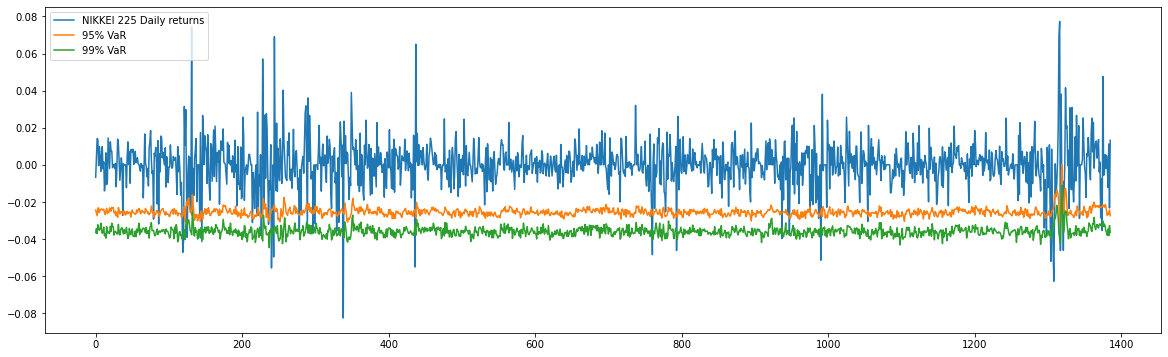

In [45]:
plt.figure(figsize=(20,6))
plt.plot(data['NiKKEI'][7090:].values, label='NIKKEI 225 Daily returns')
plt.plot(var_95, label='95% VaR')
plt.plot(var_99, label='99% VaR')
#plt.title('95% VaR vs 99% VaR')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='upper left')
plt.show()

In [33]:
final_preds = np.zeros((1386,1000))

for i in range(0,1386):
    S = pd.DataFrame(np.random.normal(0,1,1000))
    for j in range(0,1000):        
        final_preds[i][j] = preds[i] + (S[0][j] * K) 

In [34]:
final_preds=np.sort(final_preds)
final_preds=np.flip(final_preds)

In [35]:
final_preds

array([[ 0.04621391,  0.0410432 ,  0.0383819 , ..., -0.04501314,
        -0.04510424, -0.04554068],
       [ 0.04129414,  0.04047458,  0.04032133, ..., -0.04314619,
        -0.04538281, -0.05266052],
       [ 0.04593566,  0.04431657,  0.04200192, ..., -0.04598267,
        -0.04621951, -0.04770914],
       ...,
       [ 0.04572617,  0.03711687,  0.0363677 , ..., -0.04275572,
        -0.05056276, -0.05234074],
       [ 0.05612988,  0.05085383,  0.04389324, ..., -0.0410055 ,
        -0.04631854, -0.04721259],
       [ 0.04442744,  0.04440171,  0.03774001, ..., -0.04002123,
        -0.04437712, -0.05128442]])

In [36]:
var05 = np.zeros(1386)
var01 = np.zeros(1386)
for i in range(0,1386):
    var05[i] = 0.5*(final_preds[i][950]+final_preds[i][951])
    var01[i] = 0.5*(final_preds[i][990]+final_preds[i][991])

In [37]:
var05=pd.DataFrame(var05)
var05

,0
0,-0.028075
1,-0.024770
2,-0.025717
3,-0.026259
4,-0.026375
...,...
1381,-0.021849
1382,-0.023597
1383,-0.025265
1384,-0.025518


In [38]:
test_y=pd.DataFrame(test_y)

In [39]:
breaches = (test_y<var05).sum()

In [40]:
breaches

0    47
dtype: int64

In [41]:
var01=pd.DataFrame(var01)
var01

,0
0,-0.038297
1,-0.035166
2,-0.036134
3,-0.037263
4,-0.036917
...,...
1381,-0.037073
1382,-0.036492
1383,-0.037974
1384,-0.037007


In [42]:
breaches2 = (test_y<var01).sum()

In [43]:
breaches2

0    20
dtype: int64

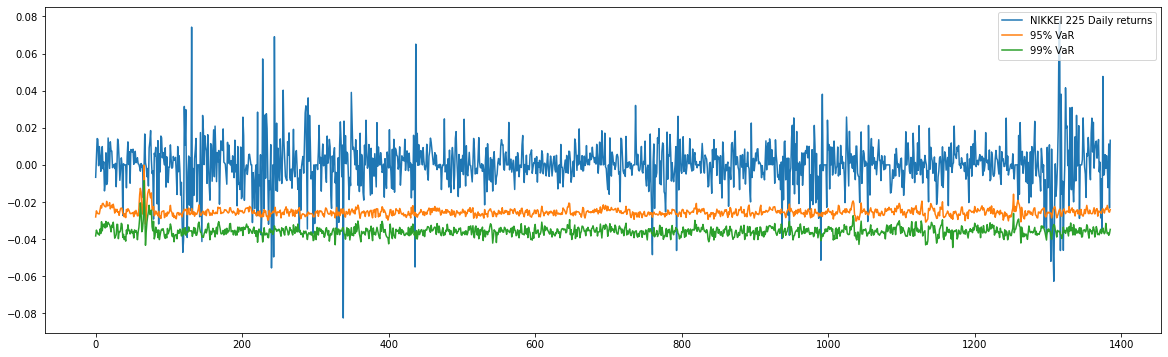

In [44]:
plt.figure(figsize=(20,6))
plt.plot(data['NiKKEI'][7090:].values, label='NIKKEI 225 Daily returns')
plt.plot(var05, label='95% VaR')
plt.plot(var01, label='99% VaR')
#plt.title('95% VaR vs 99% VaR')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='upper right')
plt.show()